In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [5]:
df = pd.read_csv("/Users/maurits/Documents/Ironhack/week_05/lab19/lab-eda-univariate/amz_uk_price_prediction_dataset.csv")

In [7]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [10]:
df.shape

(2443651, 9)

In [12]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [14]:
df.select_dtypes("object").nunique().sort_values(ascending=False)

asin        2222742
title       2077591
category        296
dtype: int64

In [15]:
# Check for null values
df.isnull().sum().sort_values(ascending=False)

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories and their best-seller status.

Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.

Are there categories where being a best-seller is more prevalent?

In [17]:
crosstab_result = pd.crosstab(df['category'], df['isBestSeller']).sort_values(True, ascending=False).iloc[:10]
crosstab_result

# Best sellers seem most amongst Grocery, Health & Personal care, and Baby.

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
Beauty,19010,302
Pet Supplies,9152,285
Arts & Crafts,9319,230
Women,17559,213


Statistical Tests:

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
Compute Cramér's V to understand the strength of association between best-seller status and category.

- The chi-square test is a statistical test used to **determine whether there is a significant association between two categorical variables**.
- Interpretation: if p-value < 0.05, this suggests that there is a significant association between the categorical variables. P-value >= 0.05, indicates that there is not enough evidence to conclude a significant association between the variables.

In [21]:
from scipy.stats import chi2_contingency

# Chi-square test for 'category' and 'isBestSeller'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(27528.93151182601, 0.0)

P-value is < 0.05 so this suggest that there is a significant association between the categorical variables.

Compute Cramér's V to understand the strength of association between best-seller status and category.

- Cramer's V is a measure of association used to **quantify the strength of the relationship between categorical variables**.
- Interpretation: Cramer's V ranges from 0 to 1, where **0 indicates no association, and 1 represents a perfect association between the variables**. A higher value of Cramer's V indicates a stronger relationship between the categorical variables.

In [26]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result, method="cramer")

0.16999680408904638

Answer: there is some association, although it seems weak.

Visualizations:

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

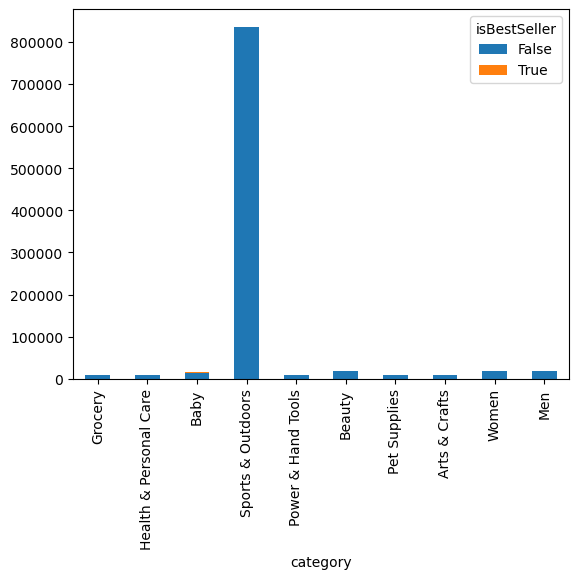

In [30]:
crosstab_result.plot(kind="bar", stacked=True);

Part 2: Exploring Product Prices and Ratings Across Categories and Brands
Objective: Investigate how different product categories influence product prices.

Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
Which product category tends to have the highest median price? Don't filter here by top categories.
Bar Charts:

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
Which product category commands the highest average price? Don't filter here by top categories.
Box Plots:

Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [33]:
df_top20 = df['category'].value_counts().iloc[:20]
df_top20

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Manicure & Pedicure Products               18940
Skin Care                                  18769
Make-up                                    18756
Hair Care                                  18735
Fragrances                                 18564
Handmade Gifts                             18295
Handmade Home Décor                        18146
Luggage and travel gear                    18142
Handmade Jewellery                         18044
Handmade Artwork                           17878
Women                                      17772
Handmade Home & Kitchen Products           17435
Handmade Kitchen & Dining                  17432
Men                                        17417
Baby                                       15050
Name: count

In [35]:
df_top30303 = df[df['category'].isin(df_top20)]
df_top30303

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category


In [37]:
df_top30303.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category


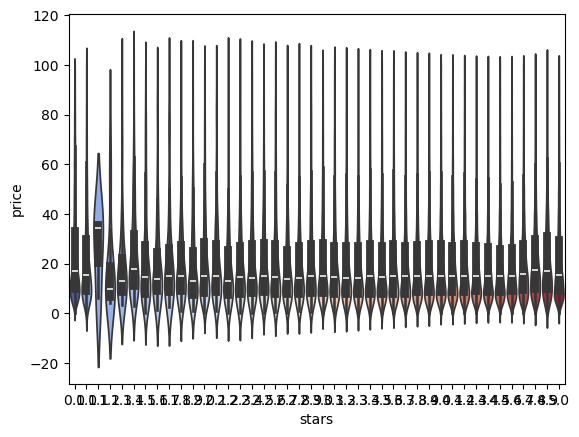

In [39]:
#price quantiles
Q1_p = df['price'].quantile(0.25)
Q3_p = df['price'].quantile(0.75)
IQR_p = Q3_p - Q1_p

#rating quantiles
Q1_s = df['stars'].quantile(0.25)
Q3_s = df['stars'].quantile(0.75)
IQR_s = Q3_s - Q1_s

# Define lower and upper bounds for outliers
lower_bound_p = Q1_p - 1.5 * IQR_p
upper_bound_p = Q3_p + 1.5 * IQR_p
lower_bound_s = Q1_s - 1.5 * IQR_s
upper_bound_s = Q3_s + 1.5 * IQR_s

filtered_df = df[(df['price'] >= lower_bound_p) & (df['price'] <= upper_bound_p) &
                 (df['stars'] >= lower_bound_s) & (df['stars'] <= upper_bound_s)]

filtered_df
# Plot the violin plot
sns.violinplot(data=filtered_df, x='stars', y='price', palette="coolwarm", hue='stars', legend=False)

plt.show()

In [59]:
df_grouped = filtered_df.groupby('category')['reviews'].sum()


In [61]:
df_grouped



category
3D Printers                           6842
3D Printing & Scanning               89790
Abrasive & Finishing Products       102612
Action Cameras                      154916
Adapters                           1753629
                                    ...   
Wind Instruments                     76342
Window Treatments                   534483
Women                             21708370
Women's Sports & Outdoor Shoes     1661978
eBook Readers & Accessories          83711
Name: reviews, Length: 296, dtype: int64

Correlation Coefficients:

Calculate the correlation coefficient between price and stars.
Is there a significant correlation between product price and its rating?
Visualizations:

Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
Use a correlation heatmap to visualize correlations between all numerical variables.
Examine if product prices typically follow a normal distribution using a QQ plot.

In [65]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [106]:
df_filtered = df[df.stars > 0.01]
# mean = df_filtered.stars.mean()
# std = df_filtered.stars.std()
# low = mean - (3*std)
# high = mean + (3*std)
# high
# filtered2 = df[df.filtered.stars >

5.985021013611301

<Axes: xlabel='stars', ylabel='price'>

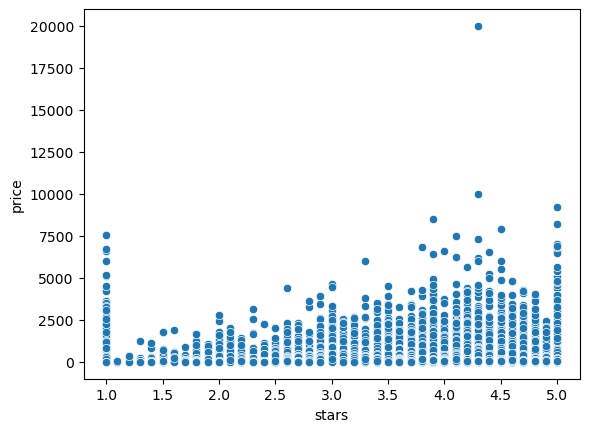

In [96]:
sns.scatterplot(data=df_filtered, x='stars', y='price')

In [ ]:
correlation_matrix = df_grouped2.corr()